In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_olivetti_faces
data=fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/pc-/scikit_learn_data


In [3]:
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
print("Data shape",data.data.shape)
print("Target Shapes",data.target.shape)
print("There are {} unique persons in the dataset".format(len(np.unique(data.target))))
print("Size of each image is {}x{}".format(data.images.shape[-1],data.images.shape[1]))

Data shape (400, 4096)
Target Shapes (400,)
There are 40 unique persons in the dataset
Size of each image is 64x64


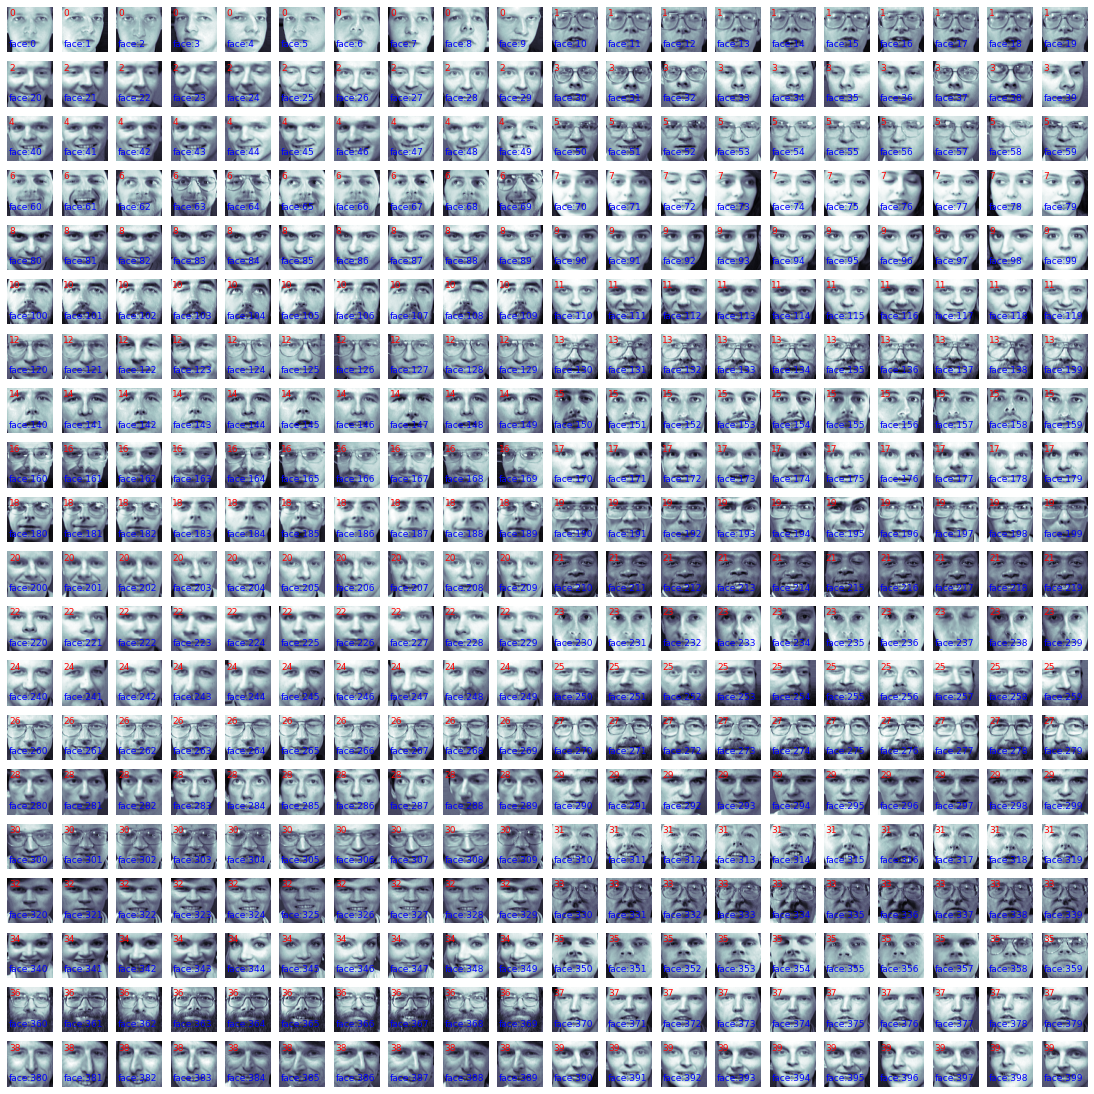

In [42]:
def print_faces(images,target,top_n):
    top_n=min(top_n,len(images))
    grid_size=int(np.ceil(np.sqrt(top_n)))
    fig,axes=plt.subplots(grid_size,grid_size,figsize=(15,15))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=.2,wspace=.2)
    
    for i,ax in enumerate(axes.ravel()):
        if i<top_n:
            ax.imshow(images[i],cmap="bone")
            ax.axis("off")
            ax.text(2,12,str(target[i]),fontsize=9,color="red")
            ax.text(2,55,f"face:{i}",fontsize=9,color="blue")
        else:
            ax.axis('off')
    plt.show()
print_faces(data.images,data.target,400)
            

In [43]:
def display_unique_faces(pics):
    fig=plt.figure(figsize=(24,10))
    col,row=10,4
    
    for i in range(1,col*row+1):
        img_index=10*i-1
        if img_index<pics.shape[0]:
            img=pics[img_index,:,:]
            ax=fig.add_subplot(row,col,i)
            ax.imshow(img,cmap="gray")
            ax.set_title(f"Person {i}",fontsize=14)
            ax.axis('off')
            plt.suptitle("There are 40 distinct person faces are there in the dataset",fontsize=24)
plt.show()
    

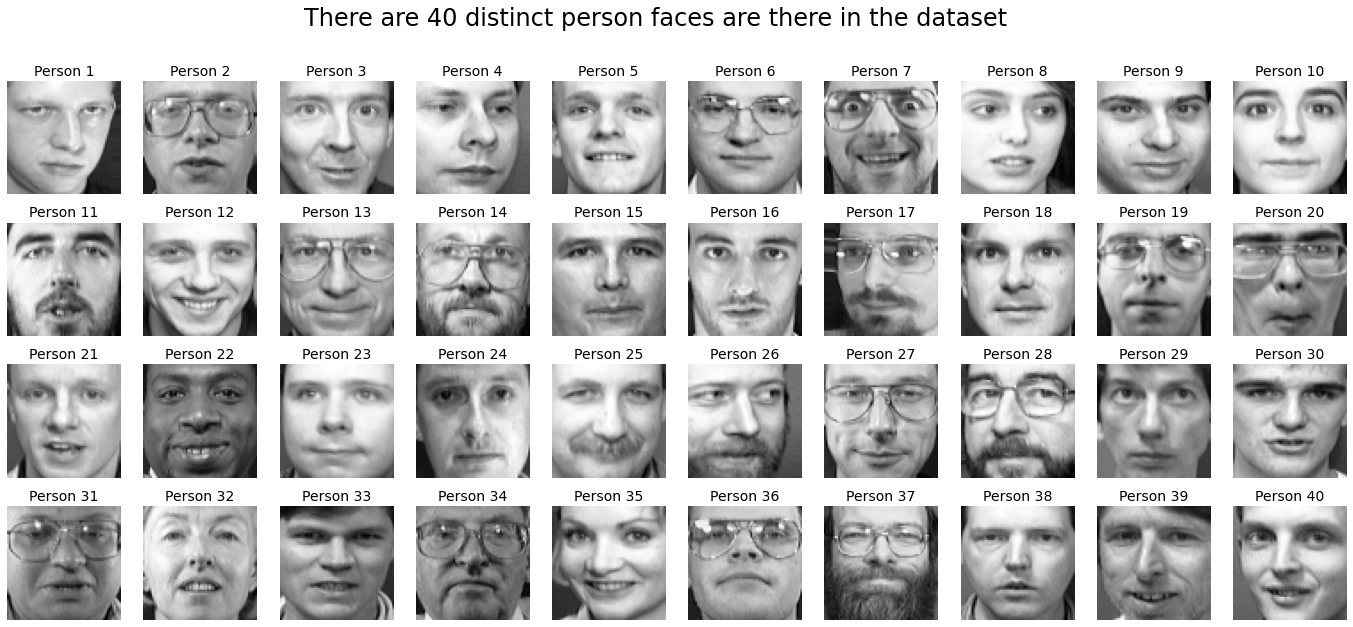

In [44]:
display_unique_faces(data.images)

In [45]:
from sklearn.model_selection import train_test_split
x=data.data
y=data.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=46)
print("x train:",xtrain.shape)
print("x test:",xtest.shape)

x train: (280, 4096)
x test: (120, 4096)


In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [47]:
ypred=nb.predict(xtest)
nbaccuracy=round(accuracy_score(ytest,ypred)*100,2)
cm=confusion_matrix(ytest,ypred)
print("Confusion matrix:",cm)

Confusion matrix: [[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]


In [48]:
print(f"Naive bayes accuracy:{nbaccuracy}")

Naive bayes accuracy:73.33


In [49]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)


MultinomialNB()

 Multinomial Naive bayes accuracy:85.83
number of missclassified images 17
Total images in test set 120
Accuracy: 85.83 %


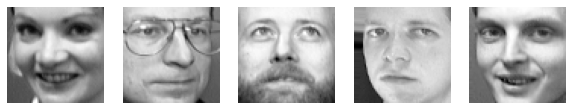

In [53]:
ypred=nb.predict(xtest)
nbaccuracy=round(accuracy_score(ytest,ypred)*100,2)
print(f" Multinomial Naive bayes accuracy:{nbaccuracy}")

missclass=np.where(ypred!=ytest)[0]
nummissclass=len(missclass)
print("number of missclassified images",nummissclass)
print("Total images in test set",len(ytest))
print("Accuracy:",round((1-nummissclass/len(ytest))*100,2),"%")

nmissclass=min(nummissclass,5)
plt.figure(figsize=(10,5))
for i in range(nmissclass):
    idx=missclass[i]
    plt.subplot(1,nmissclass,i+1)
    plt.imshow(xtest[idx].reshape(64,64),cmap="gray")
    plt.axis("off")
plt.show()

In [51]:
missclass=np.where(ypred!=ytest)[0]
nummissclass=len(missclass)
print("number of missclassified images",nummissclass)
print("Total images in test set",len(ytest))
print("Accuracy:",round((1-nummissclass/len(ytest))*100,2),"%")


number of missclassified images 17
Total images in test set 120
Accuracy: 85.83 %


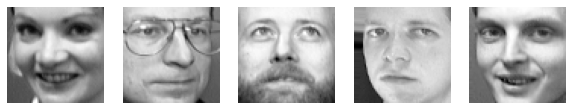

In [52]:
nmissclass=min(nummissclass,5)
plt.figure(figsize=(10,5))
for i in range(nmissclass):
    idx=missclass[i]
    plt.subplot(1,nmissclass,i+1)
    plt.imshow(xtest[idx].reshape(64,64),cmap="gray")
    plt.axis("off")
plt.show()